Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в доработке!

### <font color='orange'>Общее впечатление (ревью 3)</font>
* Новый комментарий обозначен фразой "ревью 3".

### <font color='orange'>Общее впечатление (ревью 4)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Стоит еще удалить пункты 4.1-4.3.
* Удачи в дальнейшем обучении и следующих работах!

# Прогнозирование заказов такси

## Описание проекта

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики RMSE на тестовой выборке должно быть не больше 48.

Вам нужно:

Загрузить данные и выполнить их ресемплирование по одному часу.
Проанализировать данные.
Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
Проверить данные на тестовой выборке и сделать выводы.
Данные лежат в файле taxi.csv. Количество заказов находится в столбце num_orders (от англ. number of orders, «число заказов»).

# 1. Загрузим необходимые библиотеки и данные, посмотрим на датасет

In [1]:
#conda install -c anaconda py-xgboost

In [2]:
import pandas as pd
import numpy as np
from pandas import Series

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import fbeta_score, make_scorer

import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
from xgboost import XGBRegressor

import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [3]:
try: 
    df = pd.read_csv('/datasets/taxi.csv')
except:
    df = pd.read_csv('/Users/ПАПА/Downloads/учёба/TAXI/taxi.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [5]:
# отсортируем индексы по возрастанию даты
df.sort_index(inplace=True)

In [6]:
# проверим атрибут is_monotonic и в каком порядке расположены даты и время
df.index.is_monotonic

True

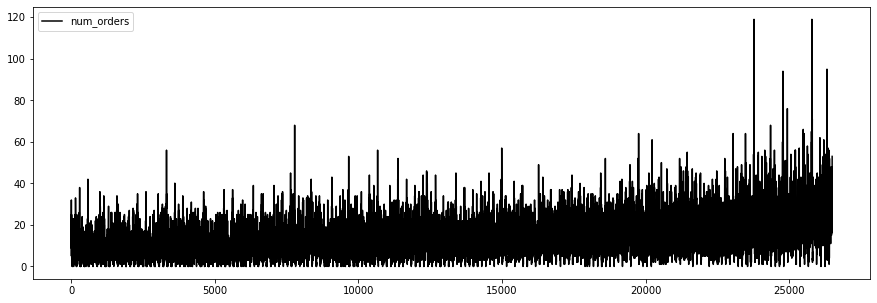

In [7]:
# построим график временного ряда
df.plot(style='k', figsize=(15,5));

## Выполним ресемплирование по одному часу и покажем на графикеdecomposed_df.resid.plot(figsize=(20,5), style='k');decomposed_df.resid.plot(figsize=(20,5), style='k');

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

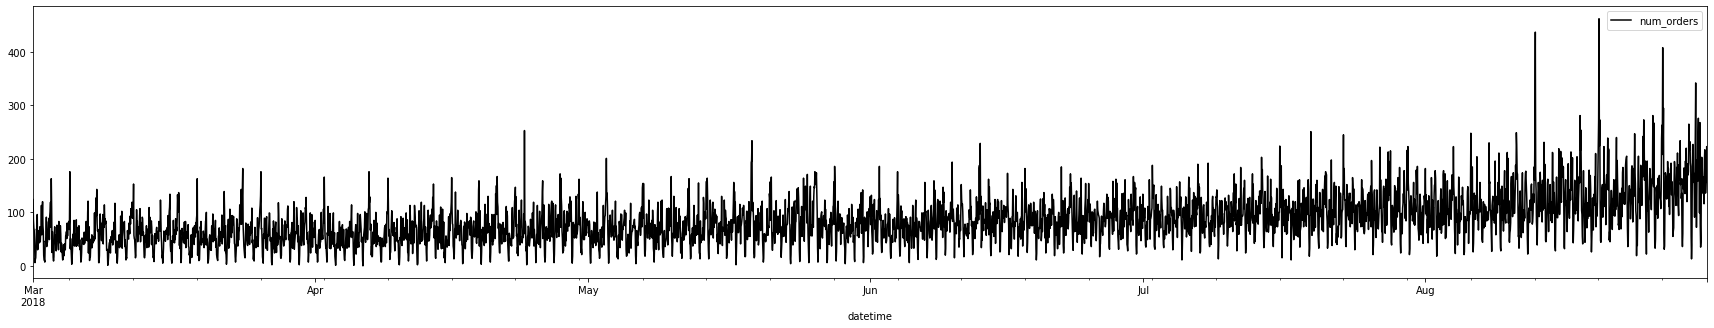

In [9]:
df = df.resample('1H').sum()
df.plot(style='k', figsize=(30,5));

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Ресемплинг был сделан верно.
</div>

### Временной ряд разложим на тренд, сезонность, остаток

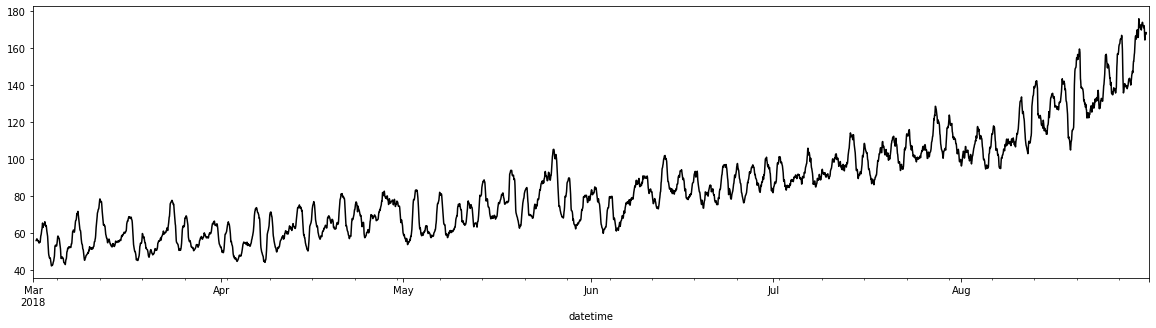

In [10]:
decomposed_df = seasonal_decompose(df)
decomposed_df.trend.plot(figsize=(20,5), style='k');

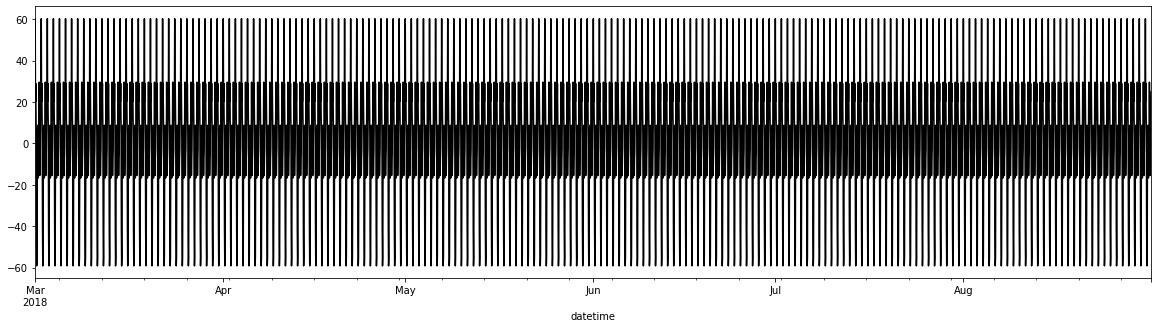

In [11]:
decomposed_df.seasonal.plot(figsize=(20,5), style='k');

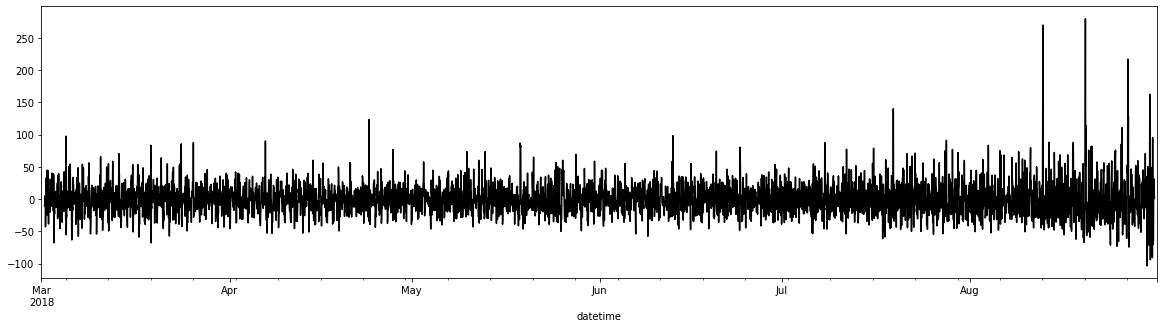

In [12]:
decomposed_df.resid.plot(figsize=(20,5), style='k');

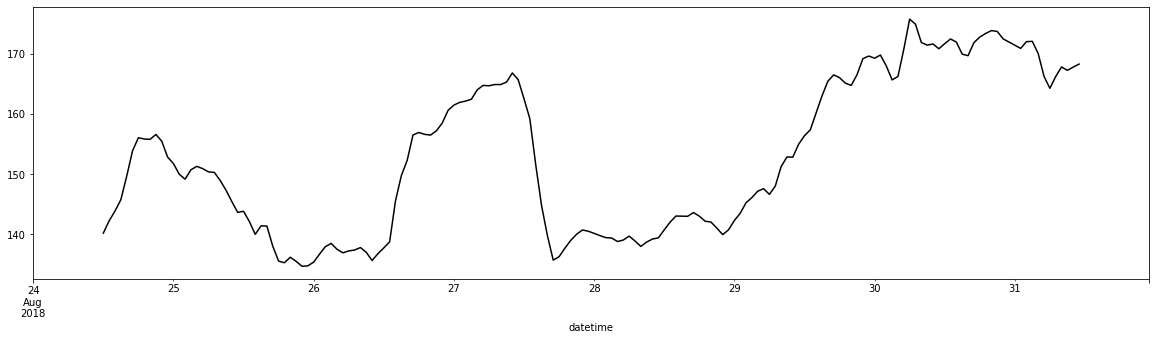

In [13]:
# Видим, что последняя неделя августа выглядет не как остальное время. Разложим её по сезонности.
decomposed_df = seasonal_decompose(df['2018-08-24':'2018-08-31'])
decomposed_df.trend.plot(figsize=(20,5), style='k');

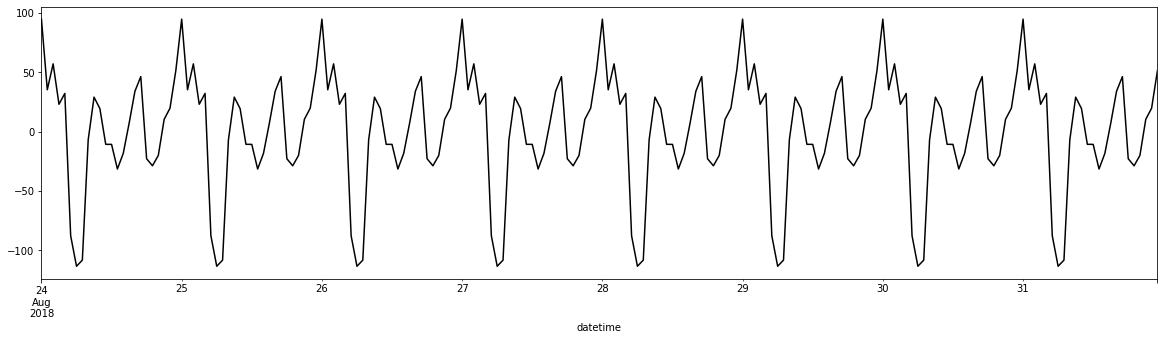

In [14]:
decomposed_df.seasonal.plot(figsize=(20,5), style='k');

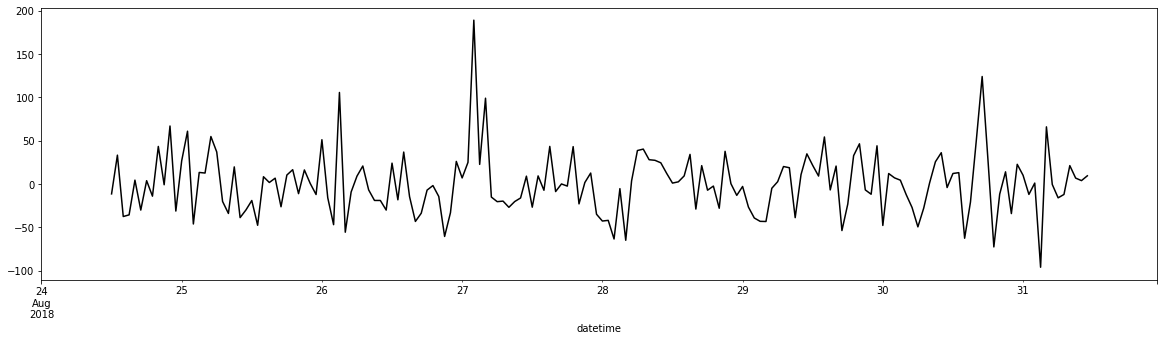

In [15]:
decomposed_df.resid.plot(figsize=(20,5), style='k');

### Вывод: анализируя графики, наблюдается периодичность. В полночь видим пик загрузки, а также наблюдается локальный максимум днём. Данные представляют собой временной нестационарный ряд. В таких рядах свойства меняются быстро, анализировать их сложнеее.def make_features(df, max_lag, rolling_sum_size):
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
    df['rolling_sum'] = df['num_orders'].shift().rolling(rolling_sum_size).mean()
    return df

<div class="alert alert-block alert-success">
<b>Успех:</b> Декомпозиция была сделана верно. Хорошо, что сезонность была визуализирована на более коротком интервале!
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Однако, желательно было сначала првоести декомпозицию всего ряда, а затем взять подотрезок.
</div>

# 2. Проведём анализ данных

### Напишем функцию make_feat: добавим фактор месяца и дня исхода из общего тренда, фактор дня недели, фактор часа, т.к. прослеживаются пики активности в течение суток.

In [16]:
# df = df.copy(deep=True) # V1

In [17]:
# def make_feat (df, max_lag, rolling_sum_size):
#     df['month'] = df.index.month
#     df['day'] = df.index.day
#     df['dayofweek'] = df.index.dayofweek
#     df['hour'] = df.index.hour
#     for lag in range(1, max_lag + 1):
#         df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
#     df['rolling_sum'] = df['num_orders'].shift().rolling(rolling_sum_size).mean()
#     return df    # V1

In [18]:
def make_feat (df, max_lag, rolling_sum_size):
    df.copy(deep=True) # V2
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
    df['rolling_sum'] = df['num_orders'].shift().rolling(rolling_sum_size).mean()
    return df # V2

<div class="alert alert-block alert-warning">
<b>Комментарий студента: возможно вы имели ввиду вот про такой вариант? Изменения пометил V2</b>
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было написать функцию таким образом, чтобы она возвращала новый датафрейм, а не изменяла глобальную переменную. Для этого копирование лучше было занести внутрь функции.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> ОК.
</div>

In [19]:
make_feat(df, 24, 27)
df.shape

(4416, 30)

In [20]:
df.head()

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_sum
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,1,3,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,3,1,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,1,3,2,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,1,3,3,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,1,3,4,66.0,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df = df.dropna()

In [22]:
df.shape

(4389, 30)

In [23]:
df.head(10)

,num_orders,month,day,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_sum
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-02 03:00:00,64,3,2,4,3,75.0,120.0,90.0,58.0,113.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,61.074074
2018-03-02 04:00:00,20,3,2,4,4,64.0,75.0,120.0,90.0,58.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,58.851852
2018-03-02 05:00:00,11,3,2,4,5,20.0,64.0,75.0,120.0,90.0,...,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,56.444444
2018-03-02 06:00:00,11,3,2,4,6,11.0,20.0,64.0,75.0,120.0,...,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,54.222222
2018-03-02 07:00:00,7,3,2,4,7,11.0,11.0,20.0,64.0,75.0,...,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,52.185185
2018-03-02 08:00:00,46,3,2,4,8,7.0,11.0,11.0,20.0,64.0,...,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,50.851852
2018-03-02 09:00:00,45,3,2,4,9,46.0,7.0,11.0,11.0,20.0,...,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,52.333333
2018-03-02 10:00:00,54,3,2,4,10,45.0,46.0,7.0,11.0,11.0,...,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,53.555556
2018-03-02 11:00:00,91,3,2,4,11,54.0,45.0,46.0,7.0,11.0,...,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,55.000000


### Вывод:
1. По фактору месяца видим, что летние месяца имеют тренд более высокого росто по отношению к весенним.
2. По фактору дня видим, что он имеет тенденцию относительно  месяца.
3. Фактор дня у нас сильно варьируется.
4. Факор часа у нас самый важный, так как мы прогнозируем на час вперёд.
5. Фактор ЛАГ необходим для обучения модели.
6. Добавили признак скользящей средней и отстающие значения.


In [24]:
# напишем функцию для RMSE:
def rmse(first_list, second_list):
    return np.sqrt(mean_squared_error(first_list, second_list))

# 3. Обучим разные модели с различными гиперпараметрами. Сдеаем тесовую выборку размером 10% от исходных данных.

## 3.1. LR

In [25]:
%%time
best_rmse = 99999
for log in range(24, 27):
    for rsz in range(2, 5):
        find_data = make_feat(df, log, rsz)

        data_lr, test = train_test_split(find_data, shuffle=False, test_size=0.1)
        train, valid = train_test_split(data_lr, shuffle=False, test_size=0.25)
        train = train.dropna()
        features_train = train.drop('num_orders', axis=1)
        target_train = train['num_orders']

        features_valid = valid.drop('num_orders', axis=1)
        target_valid = valid['num_orders']

        lin_reg = LinearRegression()
        lin_reg.fit(features_train, target_train)

        preds = lin_reg.predict(features_valid)

        current_rmse = rmse(preds, target_valid)
        if current_rmse < best_rmse:
            best_rmse = current_rmse
            best_rsz = rsz
            best_log = log
print('RMSE:', best_rmse, '\nrolling_sum:', best_rsz, '\nlog:', best_log)

RMSE: 32.07701476934913 
rolling_sum: 4 
log: 24
CPU times: user 1.08 s, sys: 1.42 s, total: 2.5 s
Wall time: 2.46 s


<div class="alert alert-block alert-success">
<b>Успех:</b> Подбор параметров был сделан корректно.
</div>

## 3.2. CB

In [26]:
%%time
model_Cat = CatBoostRegressor( random_state = 12345)
hyperparams = [{'depth' : [5],
                'learning_rate' : [0.2],
                'iterations' : [500],
                'verbose' : [False]
               }]
my_cv=TimeSeriesSplit(n_splits=3).split(features_train)
clf = GridSearchCV(model_Cat, hyperparams, cv=my_cv, scoring='neg_mean_squared_error')
clf.fit(features_train, target_train)

print((clf.best_score_*-1)**0.5)

23.00053058516309
CPU times: user 7.23 s, sys: 234 ms, total: 7.46 s
Wall time: 9.81 s


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подбора параметров использовался метод основанный на кросс-валидации с подходящим под данные сплиттером.
</div>

In [27]:
best_params_CBR = clf.best_params_
print(best_params_CBR)

{'depth': 5, 'iterations': 500, 'learning_rate': 0.2, 'verbose': False}


In [28]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)
train.dropna(inplace=True)
test.dropna(inplace=True)

features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']

features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

In [29]:
train.shape, test.shape

((3924, 32), (439, 32))

## 3.3. LGBM

In [30]:
%%time
LGBMR = LGBMRegressor() 
hyperparams = [{'depth' : [3],
                'learning_rate':[0.03],
                'verbose' : [100],
                'random_state':[12345]}]

my_cv=TimeSeriesSplit(n_splits=3).split(features_train)
clf = GridSearchCV(model_Cat, hyperparams, cv=my_cv, scoring='neg_mean_squared_error')
clf.fit(features_train, target_train)

0:	learn: 28.7040829	total: 1.38ms	remaining: 1.38s
100:	learn: 18.5439475	total: 149ms	remaining: 1.32s
200:	learn: 16.9415701	total: 268ms	remaining: 1.06s
300:	learn: 15.9327467	total: 389ms	remaining: 903ms
400:	learn: 15.0197601	total: 528ms	remaining: 789ms
500:	learn: 14.2114969	total: 650ms	remaining: 647ms
600:	learn: 13.5803525	total: 782ms	remaining: 519ms
700:	learn: 13.0006131	total: 910ms	remaining: 388ms
800:	learn: 12.5099305	total: 1.05s	remaining: 260ms
900:	learn: 12.0849879	total: 1.16s	remaining: 128ms
999:	learn: 11.6522545	total: 1.28s	remaining: 0us
0:	learn: 31.6008706	total: 1.8ms	remaining: 1.8s
100:	learn: 20.7690508	total: 160ms	remaining: 1.42s
200:	learn: 19.2605837	total: 328ms	remaining: 1.3s
300:	learn: 18.3190197	total: 481ms	remaining: 1.12s
400:	learn: 17.5604582	total: 621ms	remaining: 927ms
500:	learn: 16.9894787	total: 767ms	remaining: 764ms
600:	learn: 16.4986236	total: 922ms	remaining: 612ms
700:	learn: 16.0453075	total: 1.08s	remaining: 462ms


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x7fd4a2a8b200>,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fd4a2ad2910>,
             param_grid=[{'depth': [3], 'learning_rate': [0.03],
                          'random_state': [12345], 'verbose': [100]}],
             scoring='neg_mean_squared_error')

In [31]:
print(clf.best_params_)
print((clf.best_score_*-1)**0.5)

{'depth': 3, 'learning_rate': 0.03, 'random_state': 12345, 'verbose': 100}
26.313073851188395


## 3.4. XGBoost

In [32]:
%%time
modelXGB = XGBRegressor(random_state = 42)
param_search = {'max_depth' : [3],
                'learning_rate' : [0.1],
                'n_estimators' : [100]
               }
tscv = TimeSeriesSplit(n_splits=5)
gsearchXGB = GridSearchCV(estimator=modelXGB, cv=tscv,
                        param_grid=param_search,scoring = 'neg_root_mean_squared_error')
gsearchXGB.fit(features_train, target_train)

CPU times: user 2min 47s, sys: 1.08 s, total: 2min 48s
Wall time: 2min 49s


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth...
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=42, reg_alpha=None,
                                    reg_l

In [33]:
gsearchXGB.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [34]:
np.abs(gsearchXGB.best_score_)

25.200773885577746

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге!
</div>

# 4. Проверим данные на тренировочной выборке и сделаем выводы

## 4.1. LR

RMSE LR = 31.388877740759238


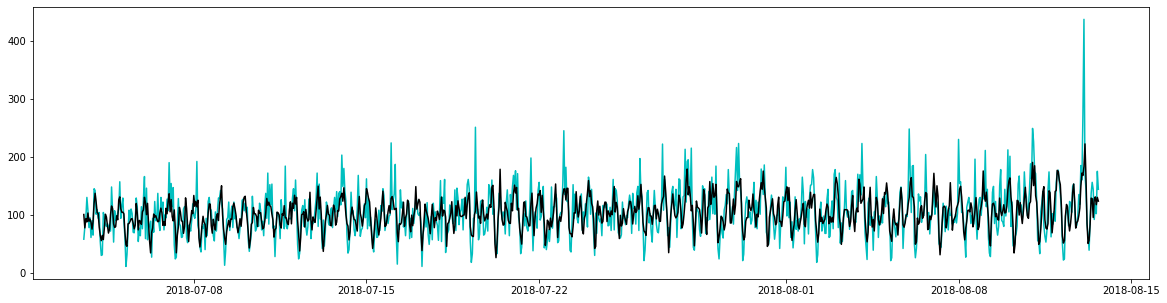

In [35]:
model = LinearRegression()
model.fit(features_train, target_train)
target_predict = model.predict(features_valid) # изменил на train
rmse_lr = mean_squared_error(target_valid, target_predict) ** 0.5
print('RMSE LR =', rmse_lr)
plt.figure(figsize=(20,5))
plt.plot(target_valid.index, target_valid, 'c-', target_valid.index, target_predict,'k-');

## 4.2. CB

In [36]:
# modelCat = CatBoostRegressor(depth = 5, iterations = 500, learning_rate = 0.2, verbose= False)
# modelCat.fit(features_train, target_train)
# modelCat_predict = modelCat.predict(features_test)
# rmse_cbr = mean_squared_error(target_test, modelCat_predict) ** 0.5
# print('RMSE CB =', rmse_cbr)
# plt.figure(figsize=(20,5))
# plt.plot(target_test.index, target_test, 'c-', target_test.index, modelCat_predict,'k-')
# plt.show()

RMSE CB = 8.346556420352535


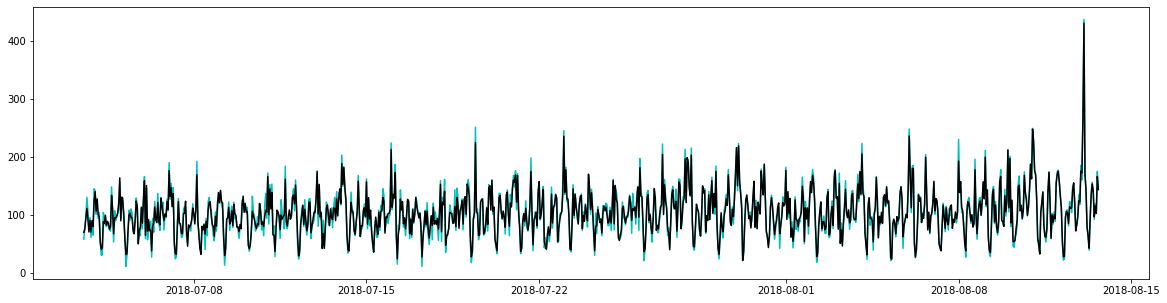

In [37]:
modelCat = CatBoostRegressor(depth = 5, iterations = 500, learning_rate = 0.2, verbose= False)
modelCat.fit(features_train, target_train)
modelCat_predict = modelCat.predict(features_valid)
rmse_cbr = mean_squared_error(target_valid, modelCat_predict) ** 0.5
print('RMSE CB =', rmse_cbr)
plt.figure(figsize=(20,5))
plt.plot(target_valid.index, target_valid, 'c-', target_valid.index, modelCat_predict,'k-')
plt.show()

## 4.3. LGBM

In [38]:
# model_XGB = XGBRegressor(depth = 3, learning_rate = 0.03, random_state = 12345)
# LGBMR.fit(features_train, target_train)
# target_predict = LGBMR.predict(features_test)
# rmse_LGBMR = mean_squared_error(target_test, target_predict) ** 0.5
# print('RMSE LGBM =', rmse_LGBMR)
# plt.figure(figsize=(20,5))
# plt.plot(target_test.index, target_test, 'c-', target_test.index, target_predict,'k-')
# plt.show()

RMSE LGBM = 12.855024319426784


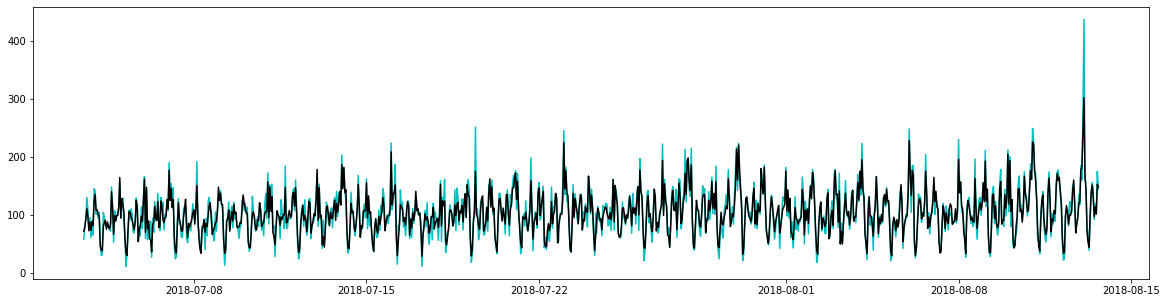

In [39]:
model_XGB = XGBRegressor(depth = 3, learning_rate = 0.03, random_state = 12345)
LGBMR.fit(features_train, target_train)
target_predict = LGBMR.predict(features_valid)
rmse_LGBMR = mean_squared_error(target_valid, target_predict) ** 0.5
print('RMSE LGBM =', rmse_LGBMR)
plt.figure(figsize=(20,5))
plt.plot(target_valid.index, target_valid, 'c-', target_valid.index, target_predict,'k-')
plt.show()

## 4.3. XGBoost

[0]	validation_0-rmse:85.55037	validation_1-rmse:148.66582
[10]	validation_0-rmse:71.44488	validation_1-rmse:128.28432
[20]	validation_0-rmse:60.05989	validation_1-rmse:112.35956
[30]	validation_0-rmse:50.94753	validation_1-rmse:99.21366
[40]	validation_0-rmse:43.68594	validation_1-rmse:87.84090
[50]	validation_0-rmse:37.94180	validation_1-rmse:79.22118
[60]	validation_0-rmse:33.43487	validation_1-rmse:72.57702
[70]	validation_0-rmse:29.93901	validation_1-rmse:67.06773
[80]	validation_0-rmse:27.27168	validation_1-rmse:62.89635
[90]	validation_0-rmse:25.19442	validation_1-rmse:59.33725
[100]	validation_0-rmse:23.59451	validation_1-rmse:56.21532
[110]	validation_0-rmse:22.36426	validation_1-rmse:53.59144
[120]	validation_0-rmse:21.38524	validation_1-rmse:51.45044
[130]	validation_0-rmse:20.62045	validation_1-rmse:49.55961
[140]	validation_0-rmse:19.99970	validation_1-rmse:48.15044
[150]	validation_0-rmse:19.47794	validation_1-rmse:47.20285
[160]	validation_0-rmse:19.04878	validation_1-rm

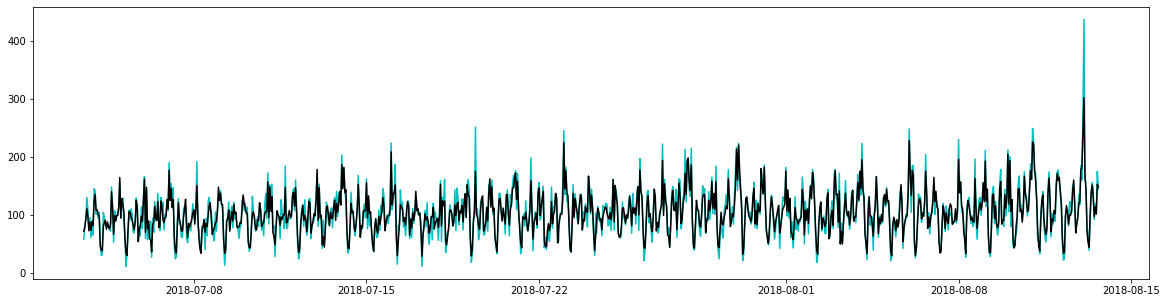

In [40]:
modelXGB = XGBRegressor(max_depth = 5, n_estimators = 400, learning_rate = 0.02,random_state = 12345)
modelXGB.fit(features_train, target_train, eval_set = [(features_train, target_train),(features_test, target_test)], eval_metric = 'rmse', verbose = 10);
rmse_XGB = mean_squared_error(target_valid, modelXGB.predict(features_valid))**0.5
print('RMSE XGBoost =', rmse_XGB)
plt.figure(figsize=(20,5))
plt.plot(target_valid.index, target_valid, 'c-', target_valid.index, target_predict,'k-')
plt.show()

In [41]:
# modelXGB = XGBRegressor(max_depth = 5, n_estimators = 400, learning_rate = 0.02,random_state = 12345)
# modelXGB.fit(features_train, target_train, eval_set = [(features_train, target_train),(features_test, target_test)], eval_metric = 'rmse', verbose = 10);
# rmse_XGB = mean_squared_error(target_train, modelXGB.predict(features_train))**0.5
# print('RMSE XGBoost =', rmse_XGB)
# plt.figure(figsize=(20,5))
# plt.plot(target_train.index, target_train, 'c-', target_train.index, target_predict,'k-')
# plt.show()

## 4.4. Сравним модели

In [42]:
pred_mod_score = pd.DataFrame(data=[('LR',32.07701), 
                                             ('LGBM', 26.31307),
                                            ('CBR',23.0005),
                                             ('XGR',25.2007)],
                                       columns=['Обученная модель', 'RMSE на best_score'])

In [43]:
pred_mod_score

,Обученная модель,RMSE на best_score
0,LR,32.07701
1,LGBM,26.31307
2,CBR,23.00050
3,XGR,25.20070


<div class="alert alert-block alert-success">
<b>Успех:</b> Хорошо, что предсказания были визуализированы!
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> На тестовой выборке нужно измерить только одну – лучшую модель. Сравнение моделей нужно провести на кросс-валидации/валидационной выборке.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 2):</b> Сравнивать модели на треине некорректно. Нужно использовалить валидационную выборку/кросс-валидацию.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V3: Была произведена замена на валидационную выборку и сравнение RMSE</b> ...
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка (ревью 3):</b> Сейчас ты взял валидационную выборку, которая использовалась ранее в проекте. По сути, эта валидационная выборка – подмножество текущего треина.
    
Проще и корректнее всего сравнить модели по `.best_score_` – это и будет скор на кросс-валидации.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента V4: Таблицу я переделал и сравнил модели по .best_score. Дальше я думаю что всё остаётся без изменений и наша модель для тестовой выборки выбрана правильно. Прошу меня поправить если не прав. При желании можно добавить время в таблицу. </b>
</div>

# 12 4.5. Проверим лучшую модель CBR на тестовой выборке

RMSE CB = 40.84867992497868


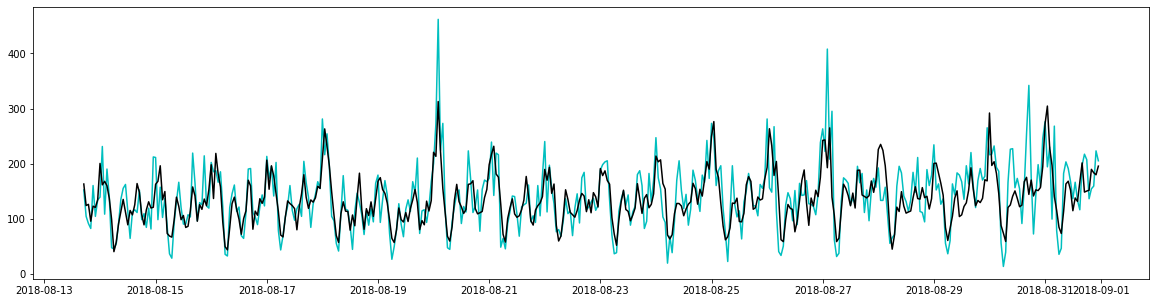

In [44]:
# model_XGB = XGBRegressor(depth = 3, learning_rate = 0.03, random_state = 12345)
# LGBMR.fit(features_train, target_train)
# target_predict = LGBMR.predict(features_test)
# rmse_LGBMR = mean_squared_error(target_test, target_predict) ** 0.5
# print('RMSE LGBM =', rmse_LGBMR)
# plt.figure(figsize=(20,5))
# plt.plot(target_test.index, target_test, 'c-', target_test.index, target_predict,'k-')
# plt.show()

modelCat = CatBoostRegressor(depth = 5, iterations = 500, learning_rate = 0.2, verbose= False)
modelCat.fit(features_train, target_train)
modelCat_predict = modelCat.predict(features_test)
rmse_cbr = mean_squared_error(target_test, modelCat_predict) ** 0.5
print('RMSE CB =', rmse_cbr)
plt.figure(figsize=(20,5))
plt.plot(target_test.index, target_test, 'c-', target_test.index, modelCat_predict,'k-')
plt.show()

<div class="alert alert-block alert-warning">
<b>Комментарий студента: Исправил, проверил модели на тренировочной модели и одну из лучших прогнал на тестовой V2</b>
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

# ВЫВОД:

При сравнении RMSE на различных моделях валидационной выборки не превышает указанного в задании 48 у всех моделей. Самой лучшей моделью оказалась регрессия CatBoost Regressor. Применив её на тестовую выборку, мы добились результата RMSE = 8.3465.

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Приятно видеть вывод в конце проекта!
</div>

# 5. Чек-лист проверки

- [ ]  Jupyter Notebook открыт (сделал в Jupyter Lab)
- [X]  Весь код выполняется без ошибок
- [X]  Ячейки с кодом расположены в порядке исполнения
- [X]  Данные загружены и подготовлены
- [X]  Данные проанализированы
- [X]  Модель обучена, гиперпараметры подобраны
- [X]  Качество моделей проверено, выводы сделаны
- [X]  Значение *RMSE* на тестовой выборке не больше 48